In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('test_sorted.csv')
df = df.loc[:, ~df.columns.isin(['round_started_at', 'date_of_test'])];
df

,user_id,question_id,question_type,group_name,track_name,subtrack_name,tag_string,game_type,num_players,question_set_id
0,0,2928,MultipleChoiceOneCorrect,act,ACT Reading,Reading,Author's Purpose or Method|Humanities|Meaning-...,PracticeGame,1,687
1,1,1668,MultipleChoiceOneCorrect,gmat,GMAT Quantitative,Problem Solving,Algebra|Interest|Problem Solving|Word Problems,CompetitiveGame,1,2952
2,2,4629,MultipleChoiceOneCorrect,act,ACT Reading,Reading,Main Idea of Paragraph or Passage|Order and Or...,DiagnosticGame,1,701
3,4,2488,MultipleChoiceOneCorrect,gmat,GMAT Verbal,Critical Reasoning,CR: Resolve Argument|Critical Reasoning,PracticeGame,2,2256
4,5,4505,MultipleChoiceOneCorrect,sat,SAT Writing,Improving Sentences,Improving Sentences|Parallel Structure|Word ch...,PracticeGame,1,1318
...,...,...,...,...,...,...,...,...,...,...
82921,181697,1609,MultipleChoiceOneCorrect,sat,SAT Writing,Improving Sentences,Conjunctions|Improving Sentences,PracticeGame,1,1314
82922,181698,2315,MultipleChoiceOneCorrect,sat,SAT Writing,Improving Sentences,Comparisons|Improving Sentences|Parallel Struc...,DiagnosticGame,1,1266
82923,181699,1483,MultipleChoiceOneCorrect,gmat,GMAT Verbal,Sentence Correction,SC: Agreement|SC: Logical Predication/Modifica...,ReviewGame,1,2585
82924,181701,1329,MultipleChoiceOneCorrect,gmat,GMAT Verbal,Sentence Correction,SC: Parallelism|Sentence Correction,CustomGame,1,2655


In [2]:
outcome = pd.read_csv('training.csv')
outcome.head(82926)

,correct,outcome,user_id,question_id,question_type,group_name,track_name,subtrack_name,tag_string,round_started_at,answered_at,deactivated_at,answer_id,game_type,num_players,date_of_test,question_set_id
0,0,2,85818,5560,0,1,5,14,222 233 240 246,2010-08-18 20:17:13,2010-08-18 20:18:18,2010-08-18 20:18:18,6540,7,1,NaN,1567
1,1,1,85818,4681,0,1,5,0,24 49,2010-08-18 20:19:12,2010-08-18 20:20:34,2010-08-18 20:20:34,4742,7,1,NaN,1227
2,1,1,85818,1529,0,1,5,0,31 49,2010-08-18 20:20:42,2010-08-18 20:21:56,2010-08-18 20:21:56,4309,7,1,NaN,1148
3,1,1,85818,2908,0,1,5,0,31 49,2010-08-18 20:22:03,2010-08-18 20:23:05,2010-08-18 20:23:05,4408,7,1,NaN,1168
4,1,1,85818,1773,0,1,5,11,183 194 207,2010-08-18 20:23:11,2010-08-18 20:26:08,2010-08-18 20:26:08,10822,7,1,NaN,2318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82921,1,1,20440,3856,0,2,7,8,145 177 186 190,2009-11-03 01:04:48,2009-11-03 01:05:43,2009-11-03 01:05:43,592,7,2,NaN,612
82922,1,1,20440,1123,0,2,7,8,145 177 195,2009-11-03 01:05:56,2009-11-03 01:07:16,2009-11-03 01:07:16,600,7,2,NaN,612
82923,1,1,20440,1657,0,2,7,8,145 177 202 223,2009-11-03 01:07:40,2009-11-03 01:08:20,2009-11-03 01:08:20,605,7,2,NaN,612
82924,1,1,20440,2954,0,2,7,8,145 177 190,2009-11-03 01:08:29,2009-11-03 01:09:06,2009-11-03 01:09:06,608,7,2,NaN,612


In [3]:
#0 = no value, #1 = correct, #2 = incorrect #3 = timed-out #4 = skipped.
df['correct?'] = outcome['correct']
df['status of question'] = outcome['outcome']
df

,user_id,question_id,question_type,group_name,track_name,subtrack_name,tag_string,game_type,num_players,question_set_id,correct?,status of question
0,0,2928,MultipleChoiceOneCorrect,act,ACT Reading,Reading,Author's Purpose or Method|Humanities|Meaning-...,PracticeGame,1,687,0,2
1,1,1668,MultipleChoiceOneCorrect,gmat,GMAT Quantitative,Problem Solving,Algebra|Interest|Problem Solving|Word Problems,CompetitiveGame,1,2952,1,1
2,2,4629,MultipleChoiceOneCorrect,act,ACT Reading,Reading,Main Idea of Paragraph or Passage|Order and Or...,DiagnosticGame,1,701,1,1
3,4,2488,MultipleChoiceOneCorrect,gmat,GMAT Verbal,Critical Reasoning,CR: Resolve Argument|Critical Reasoning,PracticeGame,2,2256,1,1
4,5,4505,MultipleChoiceOneCorrect,sat,SAT Writing,Improving Sentences,Improving Sentences|Parallel Structure|Word ch...,PracticeGame,1,1318,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
82921,181697,1609,MultipleChoiceOneCorrect,sat,SAT Writing,Improving Sentences,Conjunctions|Improving Sentences,PracticeGame,1,1314,1,1
82922,181698,2315,MultipleChoiceOneCorrect,sat,SAT Writing,Improving Sentences,Comparisons|Improving Sentences|Parallel Struc...,DiagnosticGame,1,1266,1,1
82923,181699,1483,MultipleChoiceOneCorrect,gmat,GMAT Verbal,Sentence Correction,SC: Agreement|SC: Logical Predication/Modifica...,ReviewGame,1,2585,1,1
82924,181701,1329,MultipleChoiceOneCorrect,gmat,GMAT Verbal,Sentence Correction,SC: Parallelism|Sentence Correction,CustomGame,1,2655,1,1


In [4]:
#number of supposed questions (according to question_id values)
sizeQuestion = df['question_id'].unique()
questionAmount = sizeQuestion.size;
questionAmount

5477

In [5]:
#amount of users per question_id (i.e how many users that has experienced this question.)
UserAmountPerQuestion = []
QuestionIDList = []

for n in range(questionAmount + 1):
    x = df.loc[df['question_id'] == n]
    if(len(x) != 0):
        UserAmountPerQuestion.append(len(x)) #number of users per question
        QuestionIDList.append(n) #list of question_id
        print("question_id: " + str(n) + " users: " + str(len(x)))

question_id: 0 users: 13
question_id: 1 users: 3
question_id: 2 users: 24
question_id: 3 users: 9
question_id: 4 users: 4
question_id: 5 users: 22
question_id: 6 users: 15
question_id: 7 users: 23
question_id: 9 users: 15
question_id: 10 users: 3
question_id: 11 users: 4
question_id: 12 users: 35
question_id: 13 users: 5
question_id: 14 users: 11
question_id: 15 users: 2
question_id: 16 users: 17
question_id: 17 users: 14
question_id: 18 users: 10
question_id: 19 users: 7
question_id: 20 users: 16
question_id: 21 users: 16
question_id: 22 users: 3
question_id: 23 users: 4
question_id: 24 users: 2
question_id: 25 users: 21
question_id: 26 users: 2
question_id: 27 users: 1
question_id: 28 users: 16
question_id: 29 users: 3
question_id: 30 users: 2
question_id: 31 users: 57
question_id: 32 users: 38
question_id: 33 users: 6
question_id: 34 users: 7
question_id: 35 users: 24
question_id: 36 users: 6
question_id: 37 users: 3
question_id: 38 users: 7
question_id: 39 users: 1
question_id: 40 

question_id: 345 users: 34
question_id: 347 users: 15
question_id: 348 users: 13
question_id: 349 users: 16
question_id: 350 users: 4
question_id: 351 users: 2
question_id: 352 users: 1
question_id: 353 users: 16
question_id: 355 users: 3
question_id: 356 users: 9
question_id: 357 users: 11
question_id: 358 users: 12
question_id: 359 users: 18
question_id: 360 users: 18
question_id: 361 users: 34
question_id: 362 users: 12
question_id: 363 users: 15
question_id: 364 users: 8
question_id: 365 users: 1
question_id: 367 users: 23
question_id: 368 users: 13
question_id: 370 users: 55
question_id: 371 users: 6
question_id: 372 users: 6
question_id: 373 users: 9
question_id: 374 users: 9
question_id: 375 users: 1
question_id: 377 users: 13
question_id: 379 users: 4
question_id: 380 users: 8
question_id: 381 users: 5
question_id: 382 users: 1
question_id: 383 users: 2
question_id: 384 users: 39
question_id: 385 users: 1
question_id: 386 users: 3
question_id: 388 users: 10
question_id: 389 use

question_id: 811 users: 2
question_id: 812 users: 32
question_id: 813 users: 21
question_id: 814 users: 2
question_id: 815 users: 13
question_id: 816 users: 8
question_id: 817 users: 8
question_id: 818 users: 29
question_id: 819 users: 1
question_id: 820 users: 1
question_id: 821 users: 6
question_id: 822 users: 4
question_id: 823 users: 1
question_id: 824 users: 8
question_id: 825 users: 3
question_id: 826 users: 9
question_id: 827 users: 80
question_id: 828 users: 15
question_id: 829 users: 8
question_id: 831 users: 2
question_id: 832 users: 3
question_id: 833 users: 13
question_id: 834 users: 17
question_id: 835 users: 37
question_id: 836 users: 13
question_id: 837 users: 5
question_id: 838 users: 3
question_id: 839 users: 16
question_id: 840 users: 2
question_id: 841 users: 7
question_id: 843 users: 26
question_id: 844 users: 14
question_id: 845 users: 12
question_id: 847 users: 3
question_id: 848 users: 3
question_id: 849 users: 16
question_id: 850 users: 1
question_id: 851 users:

question_id: 1377 users: 29
question_id: 1378 users: 33
question_id: 1379 users: 11
question_id: 1380 users: 8
question_id: 1381 users: 2
question_id: 1382 users: 1
question_id: 1383 users: 5
question_id: 1384 users: 6
question_id: 1387 users: 6
question_id: 1389 users: 135
question_id: 1391 users: 5
question_id: 1392 users: 39
question_id: 1393 users: 2
question_id: 1395 users: 11
question_id: 1396 users: 8
question_id: 1397 users: 11
question_id: 1398 users: 9
question_id: 1399 users: 42
question_id: 1400 users: 5
question_id: 1401 users: 3
question_id: 1402 users: 1
question_id: 1403 users: 10
question_id: 1404 users: 16
question_id: 1406 users: 27
question_id: 1407 users: 2
question_id: 1408 users: 1
question_id: 1409 users: 30
question_id: 1410 users: 1
question_id: 1411 users: 5
question_id: 1412 users: 1
question_id: 1413 users: 4
question_id: 1414 users: 16
question_id: 1415 users: 4
question_id: 1416 users: 24
question_id: 1417 users: 21
question_id: 1418 users: 76
question_id

question_id: 1941 users: 25
question_id: 1942 users: 6
question_id: 1943 users: 14
question_id: 1945 users: 5
question_id: 1947 users: 2
question_id: 1948 users: 12
question_id: 1949 users: 3
question_id: 1950 users: 3
question_id: 1951 users: 8
question_id: 1952 users: 3
question_id: 1953 users: 4
question_id: 1954 users: 28
question_id: 1955 users: 1
question_id: 1956 users: 20
question_id: 1957 users: 6
question_id: 1958 users: 6
question_id: 1959 users: 27
question_id: 1960 users: 3
question_id: 1961 users: 13
question_id: 1962 users: 20
question_id: 1963 users: 6
question_id: 1964 users: 1
question_id: 1965 users: 16
question_id: 1966 users: 7
question_id: 1967 users: 17
question_id: 1968 users: 6
question_id: 1969 users: 30
question_id: 1970 users: 29
question_id: 1971 users: 97
question_id: 1972 users: 2
question_id: 1973 users: 12
question_id: 1974 users: 1
question_id: 1976 users: 167
question_id: 1977 users: 6
question_id: 1978 users: 1
question_id: 1979 users: 5
question_id:

question_id: 2468 users: 3
question_id: 2469 users: 2
question_id: 2470 users: 2
question_id: 2471 users: 19
question_id: 2472 users: 17
question_id: 2474 users: 12
question_id: 2475 users: 33
question_id: 2476 users: 34
question_id: 2477 users: 7
question_id: 2478 users: 19
question_id: 2479 users: 6
question_id: 2481 users: 20
question_id: 2482 users: 1
question_id: 2483 users: 2
question_id: 2484 users: 15
question_id: 2485 users: 27
question_id: 2486 users: 7
question_id: 2487 users: 4
question_id: 2488 users: 24
question_id: 2489 users: 13
question_id: 2490 users: 1
question_id: 2491 users: 4
question_id: 2492 users: 3
question_id: 2493 users: 8
question_id: 2494 users: 19
question_id: 2495 users: 7
question_id: 2496 users: 17
question_id: 2497 users: 4
question_id: 2498 users: 2
question_id: 2500 users: 6
question_id: 2501 users: 9
question_id: 2504 users: 9
question_id: 2505 users: 56
question_id: 2507 users: 9
question_id: 2508 users: 14
question_id: 2509 users: 1
question_id: 

question_id: 3002 users: 12
question_id: 3003 users: 3
question_id: 3004 users: 8
question_id: 3005 users: 1
question_id: 3006 users: 3
question_id: 3007 users: 10
question_id: 3008 users: 2
question_id: 3009 users: 1
question_id: 3010 users: 40
question_id: 3012 users: 4
question_id: 3013 users: 3
question_id: 3014 users: 2
question_id: 3015 users: 7
question_id: 3016 users: 1
question_id: 3017 users: 22
question_id: 3018 users: 68
question_id: 3019 users: 11
question_id: 3020 users: 14
question_id: 3021 users: 10
question_id: 3022 users: 2
question_id: 3023 users: 1
question_id: 3025 users: 4
question_id: 3026 users: 14
question_id: 3027 users: 8
question_id: 3028 users: 13
question_id: 3029 users: 4
question_id: 3030 users: 7
question_id: 3031 users: 8
question_id: 3032 users: 11
question_id: 3033 users: 8
question_id: 3034 users: 7
question_id: 3035 users: 6
question_id: 3036 users: 27
question_id: 3037 users: 2
question_id: 3038 users: 2
question_id: 3039 users: 14
question_id: 30

question_id: 3535 users: 10
question_id: 3536 users: 11
question_id: 3537 users: 20
question_id: 3538 users: 15
question_id: 3539 users: 29
question_id: 3540 users: 7
question_id: 3541 users: 199
question_id: 3542 users: 7
question_id: 3543 users: 25
question_id: 3545 users: 2
question_id: 3546 users: 24
question_id: 3547 users: 1
question_id: 3548 users: 1
question_id: 3549 users: 4
question_id: 3550 users: 13
question_id: 3551 users: 13
question_id: 3553 users: 5
question_id: 3554 users: 1
question_id: 3555 users: 13
question_id: 3556 users: 2
question_id: 3557 users: 10
question_id: 3558 users: 4
question_id: 3559 users: 6
question_id: 3560 users: 7
question_id: 3562 users: 5
question_id: 3563 users: 2
question_id: 3564 users: 10
question_id: 3565 users: 14
question_id: 3566 users: 1
question_id: 3567 users: 13
question_id: 3568 users: 41
question_id: 3569 users: 17
question_id: 3571 users: 22
question_id: 3572 users: 8
question_id: 3573 users: 9
question_id: 3574 users: 11
question

question_id: 4161 users: 18
question_id: 4162 users: 6
question_id: 4164 users: 19
question_id: 4165 users: 1
question_id: 4168 users: 26
question_id: 4172 users: 30
question_id: 4173 users: 2
question_id: 4174 users: 1
question_id: 4175 users: 5
question_id: 4176 users: 1
question_id: 4177 users: 17
question_id: 4178 users: 33
question_id: 4179 users: 57
question_id: 4180 users: 2
question_id: 4181 users: 3
question_id: 4183 users: 6
question_id: 4184 users: 17
question_id: 4185 users: 5
question_id: 4186 users: 1
question_id: 4187 users: 13
question_id: 4189 users: 5
question_id: 4190 users: 6
question_id: 4191 users: 8
question_id: 4192 users: 37
question_id: 4193 users: 2
question_id: 4194 users: 22
question_id: 4195 users: 1
question_id: 4196 users: 23
question_id: 4197 users: 1
question_id: 4199 users: 8
question_id: 4200 users: 44
question_id: 4201 users: 26
question_id: 4202 users: 8
question_id: 4203 users: 4
question_id: 4204 users: 2
question_id: 4205 users: 15
question_id: 

question_id: 4821 users: 3
question_id: 4822 users: 17
question_id: 4824 users: 57
question_id: 4826 users: 10
question_id: 4827 users: 10
question_id: 4828 users: 98
question_id: 4829 users: 8
question_id: 4830 users: 12
question_id: 4831 users: 1
question_id: 4832 users: 4
question_id: 4833 users: 2
question_id: 4834 users: 26
question_id: 4835 users: 15
question_id: 4837 users: 7
question_id: 4838 users: 4
question_id: 4839 users: 5
question_id: 4840 users: 40
question_id: 4841 users: 10
question_id: 4844 users: 9
question_id: 4845 users: 6
question_id: 4846 users: 9
question_id: 4847 users: 7
question_id: 4848 users: 12
question_id: 4849 users: 16
question_id: 4850 users: 187
question_id: 4852 users: 23
question_id: 4853 users: 6
question_id: 4854 users: 8
question_id: 4856 users: 3
question_id: 4857 users: 7
question_id: 4858 users: 28
question_id: 4859 users: 2
question_id: 4860 users: 23
question_id: 4861 users: 6
question_id: 4863 users: 21
question_id: 4864 users: 8
question_i

question_id: 5463 users: 13
question_id: 5464 users: 22
question_id: 5465 users: 41
question_id: 5466 users: 24
question_id: 5467 users: 7
question_id: 5468 users: 4
question_id: 5469 users: 3
question_id: 5470 users: 2
question_id: 5471 users: 6
question_id: 5472 users: 2
question_id: 5473 users: 27
question_id: 5474 users: 6
question_id: 5475 users: 15
question_id: 5477 users: 12


# categorial upon SAT, ACT and GMAT scores, whenever they got the question right or wrong.

In [6]:
#use these arrays as needed.
#UserAmountPerQuestion = []
#QuestionIDList = []

act = df.loc[df['group_name'] == 'act']
gmat = df.loc[df['group_name'] == 'gmat']

#ACTQuestionsGotRight = []
#ACTQuestionsGotWrong = []
#GMATQuestionsGotRight = []
#GMATQuestionsGotWrong = []

#about 88,000 users and about 5500 questions (1640 SAT, 1682 ACT, 2155 GMAT)
#about 29,000 users taking the SAT
#about 19,800 users taking the ACT
#about 33,500 users taking the GMAT

In [7]:
sat = df.loc[df['group_name'] == 'sat']

UsersPerSATQuestion = []
SATQuestionIDList = []
SATQuestionsGotRight = []
SATQuestionsGotWrong = []

for n in range(1641):
    x = sat.loc[sat['question_id'] == n]
    if(len(x) != 0):
        UsersPerSATQuestion.append(len(x)) #number of users per question
        SATQuestionIDList.append(n) #list of question_id
        
for i in SATQuestionIDList:
    a = sat.loc[(sat['question_id'] == i) & (sat['correct?'] == 1)]
    b = sat.loc[(sat['question_id'] == i) & (sat['correct?'] == 0)]
    SATQuestionsGotRight.append(len(a))
    SATQuestionsGotWrong.append(len(b))
    print('SAT question_id:' + str(i) + '  SAT users got right: ' + str(len(a)) + '   SAT users got wrong: ' + str(len(b)))

SAT question_id:0  SAT users got right: 6   SAT users got wrong: 7
SAT question_id:7  SAT users got right: 15   SAT users got wrong: 8
SAT question_id:17  SAT users got right: 8   SAT users got wrong: 6
SAT question_id:30  SAT users got right: 2   SAT users got wrong: 0
SAT question_id:31  SAT users got right: 34   SAT users got wrong: 23
SAT question_id:33  SAT users got right: 4   SAT users got wrong: 2
SAT question_id:37  SAT users got right: 1   SAT users got wrong: 2
SAT question_id:38  SAT users got right: 4   SAT users got wrong: 3
SAT question_id:40  SAT users got right: 0   SAT users got wrong: 2
SAT question_id:51  SAT users got right: 9   SAT users got wrong: 5
SAT question_id:53  SAT users got right: 12   SAT users got wrong: 10
SAT question_id:64  SAT users got right: 14   SAT users got wrong: 13
SAT question_id:66  SAT users got right: 40   SAT users got wrong: 36
SAT question_id:68  SAT users got right: 2   SAT users got wrong: 1
SAT question_id:69  SAT users got right: 

SAT question_id:924  SAT users got right: 1   SAT users got wrong: 0
SAT question_id:928  SAT users got right: 4   SAT users got wrong: 4
SAT question_id:937  SAT users got right: 3   SAT users got wrong: 2
SAT question_id:941  SAT users got right: 2   SAT users got wrong: 2
SAT question_id:946  SAT users got right: 5   SAT users got wrong: 8
SAT question_id:948  SAT users got right: 22   SAT users got wrong: 16
SAT question_id:952  SAT users got right: 2   SAT users got wrong: 0
SAT question_id:953  SAT users got right: 6   SAT users got wrong: 7
SAT question_id:958  SAT users got right: 2   SAT users got wrong: 1
SAT question_id:964  SAT users got right: 3   SAT users got wrong: 8
SAT question_id:966  SAT users got right: 13   SAT users got wrong: 9
SAT question_id:967  SAT users got right: 9   SAT users got wrong: 4
SAT question_id:969  SAT users got right: 40   SAT users got wrong: 24
SAT question_id:970  SAT users got right: 1   SAT users got wrong: 0
SAT question_id:974  SAT user

In [8]:
rightSum = 0
wrongSum = 0

for x in SATQuestionsGotRight:
    rightSum = rightSum + x

for x in SATQuestionsGotWrong:
    wrongSum = wrongSum + x


print("# of right users: " + str(rightSum) + " # of wrong users: " + str(wrongSum) + " total: " + str(rightSum + wrongSum))
#56.1% got SAT questions correct.

# of right users: 4073 # of wrong users: 3186 total: 7259


In [9]:
act = df.loc[df['group_name'] == 'act']

UsersPerACTQuestion = []
ACTQuestionIDList = []
ACTQuestionsGotRight = []
ACTQuestionsGotWrong = []

for n in range(1683):
    x = act.loc[act['question_id'] == n]
    if(len(x) != 0):
        UsersPerACTQuestion.append(len(x)) #number of users per question
        ACTQuestionIDList.append(n) #list of question_id
        
for i in ACTQuestionIDList:
    a = act.loc[(act['question_id'] == i) & (act['correct?'] == 1)]
    b = act.loc[(act['question_id'] == i) & (act['correct?'] == 0)]
    ACTQuestionsGotRight.append(len(a))
    ACTQuestionsGotWrong.append(len(b))
    print('ACT question_id:' + str(i) + '  ACT users got right: ' + str(len(a)) + '   ACT users got wrong: ' + str(len(b)))

ACT question_id:15  ACT users got right: 2   ACT users got wrong: 0
ACT question_id:16  ACT users got right: 9   ACT users got wrong: 8
ACT question_id:22  ACT users got right: 1   ACT users got wrong: 2
ACT question_id:23  ACT users got right: 2   ACT users got wrong: 2
ACT question_id:24  ACT users got right: 2   ACT users got wrong: 0
ACT question_id:26  ACT users got right: 0   ACT users got wrong: 2
ACT question_id:28  ACT users got right: 11   ACT users got wrong: 5
ACT question_id:29  ACT users got right: 3   ACT users got wrong: 0
ACT question_id:34  ACT users got right: 3   ACT users got wrong: 4
ACT question_id:35  ACT users got right: 15   ACT users got wrong: 9
ACT question_id:36  ACT users got right: 3   ACT users got wrong: 3
ACT question_id:42  ACT users got right: 3   ACT users got wrong: 0
ACT question_id:44  ACT users got right: 0   ACT users got wrong: 1
ACT question_id:49  ACT users got right: 4   ACT users got wrong: 1
ACT question_id:50  ACT users got right: 1   A

ACT question_id:906  ACT users got right: 1   ACT users got wrong: 0
ACT question_id:907  ACT users got right: 11   ACT users got wrong: 9
ACT question_id:909  ACT users got right: 3   ACT users got wrong: 9
ACT question_id:910  ACT users got right: 1   ACT users got wrong: 1
ACT question_id:918  ACT users got right: 24   ACT users got wrong: 29
ACT question_id:919  ACT users got right: 2   ACT users got wrong: 4
ACT question_id:920  ACT users got right: 4   ACT users got wrong: 2
ACT question_id:923  ACT users got right: 1   ACT users got wrong: 0
ACT question_id:927  ACT users got right: 5   ACT users got wrong: 8
ACT question_id:932  ACT users got right: 1   ACT users got wrong: 1
ACT question_id:938  ACT users got right: 7   ACT users got wrong: 9
ACT question_id:942  ACT users got right: 8   ACT users got wrong: 4
ACT question_id:949  ACT users got right: 0   ACT users got wrong: 1
ACT question_id:950  ACT users got right: 3   ACT users got wrong: 6
ACT question_id:954  ACT users 

ACT question_id:1681  ACT users got right: 5   ACT users got wrong: 0
ACT question_id:1682  ACT users got right: 2   ACT users got wrong: 3


In [10]:
rightSum = 0
wrongSum = 0

for x in ACTQuestionsGotRight:
    rightSum = rightSum + x

for x in ACTQuestionsGotWrong:
    wrongSum = wrongSum + x


print("# of right users: " + str(rightSum) + " # of wrong users: " + str(wrongSum) + " total: " + str(rightSum + wrongSum))
#57.6% of ACT Questions were correct.

# of right users: 2706 # of wrong users: 1989 total: 4695


In [11]:
gmat = df.loc[df['group_name'] == 'gmat']

UsersPerGMATQuestion = []
GMATQuestionIDList = []
GMATQuestionsGotRight = []
GMATQuestionsGotWrong = []

for n in range(2156):
    x = gmat.loc[gmat['question_id'] == n]
    if(len(x) != 0):
        UsersPerGMATQuestion.append(len(x)) #number of users per question
        GMATQuestionIDList.append(n) #list of question_id
        
for i in GMATQuestionIDList:
    a = gmat.loc[(gmat['question_id'] == i) & (gmat['correct?'] == 1)]
    b = gmat.loc[(gmat['question_id'] == i) & (gmat['correct?'] == 0)]
    GMATQuestionsGotRight.append(len(a))
    GMATQuestionsGotWrong.append(len(b))
    print('GMAT question_id:' + str(i) + '  GMAT users got right: ' + str(len(a)) + '   GMAT users got wrong: ' + str(len(b)))

GMAT question_id:1  GMAT users got right: 3   GMAT users got wrong: 0
GMAT question_id:2  GMAT users got right: 16   GMAT users got wrong: 8
GMAT question_id:3  GMAT users got right: 4   GMAT users got wrong: 5
GMAT question_id:4  GMAT users got right: 4   GMAT users got wrong: 0
GMAT question_id:5  GMAT users got right: 15   GMAT users got wrong: 7
GMAT question_id:6  GMAT users got right: 8   GMAT users got wrong: 7
GMAT question_id:9  GMAT users got right: 9   GMAT users got wrong: 6
GMAT question_id:10  GMAT users got right: 2   GMAT users got wrong: 1
GMAT question_id:11  GMAT users got right: 2   GMAT users got wrong: 2
GMAT question_id:12  GMAT users got right: 22   GMAT users got wrong: 13
GMAT question_id:13  GMAT users got right: 4   GMAT users got wrong: 1
GMAT question_id:14  GMAT users got right: 8   GMAT users got wrong: 3
GMAT question_id:18  GMAT users got right: 8   GMAT users got wrong: 2
GMAT question_id:19  GMAT users got right: 3   GMAT users got wrong: 4
GMAT ques

GMAT question_id:672  GMAT users got right: 2   GMAT users got wrong: 4
GMAT question_id:676  GMAT users got right: 3   GMAT users got wrong: 0
GMAT question_id:677  GMAT users got right: 9   GMAT users got wrong: 6
GMAT question_id:681  GMAT users got right: 14   GMAT users got wrong: 21
GMAT question_id:683  GMAT users got right: 10   GMAT users got wrong: 4
GMAT question_id:691  GMAT users got right: 3   GMAT users got wrong: 2
GMAT question_id:693  GMAT users got right: 12   GMAT users got wrong: 9
GMAT question_id:698  GMAT users got right: 8   GMAT users got wrong: 4
GMAT question_id:699  GMAT users got right: 158   GMAT users got wrong: 135
GMAT question_id:701  GMAT users got right: 6   GMAT users got wrong: 5
GMAT question_id:706  GMAT users got right: 9   GMAT users got wrong: 2
GMAT question_id:707  GMAT users got right: 2   GMAT users got wrong: 0
GMAT question_id:708  GMAT users got right: 27   GMAT users got wrong: 11
GMAT question_id:713  GMAT users got right: 16   GMAT 

GMAT question_id:1215  GMAT users got right: 5   GMAT users got wrong: 6
GMAT question_id:1217  GMAT users got right: 4   GMAT users got wrong: 0
GMAT question_id:1221  GMAT users got right: 9   GMAT users got wrong: 9
GMAT question_id:1222  GMAT users got right: 21   GMAT users got wrong: 12
GMAT question_id:1224  GMAT users got right: 7   GMAT users got wrong: 7
GMAT question_id:1225  GMAT users got right: 4   GMAT users got wrong: 2
GMAT question_id:1228  GMAT users got right: 21   GMAT users got wrong: 6
GMAT question_id:1230  GMAT users got right: 4   GMAT users got wrong: 5
GMAT question_id:1234  GMAT users got right: 2   GMAT users got wrong: 3
GMAT question_id:1235  GMAT users got right: 4   GMAT users got wrong: 1
GMAT question_id:1237  GMAT users got right: 23   GMAT users got wrong: 14
GMAT question_id:1239  GMAT users got right: 5   GMAT users got wrong: 2
GMAT question_id:1240  GMAT users got right: 2   GMAT users got wrong: 1
GMAT question_id:1241  GMAT users got right: 1

GMAT question_id:1943  GMAT users got right: 9   GMAT users got wrong: 5
GMAT question_id:1947  GMAT users got right: 1   GMAT users got wrong: 1
GMAT question_id:1950  GMAT users got right: 3   GMAT users got wrong: 0
GMAT question_id:1951  GMAT users got right: 5   GMAT users got wrong: 3
GMAT question_id:1957  GMAT users got right: 4   GMAT users got wrong: 2
GMAT question_id:1960  GMAT users got right: 3   GMAT users got wrong: 0
GMAT question_id:1964  GMAT users got right: 1   GMAT users got wrong: 0
GMAT question_id:1968  GMAT users got right: 2   GMAT users got wrong: 4
GMAT question_id:1970  GMAT users got right: 14   GMAT users got wrong: 15
GMAT question_id:1971  GMAT users got right: 53   GMAT users got wrong: 44
GMAT question_id:1973  GMAT users got right: 8   GMAT users got wrong: 4
GMAT question_id:1974  GMAT users got right: 0   GMAT users got wrong: 1
GMAT question_id:1976  GMAT users got right: 96   GMAT users got wrong: 71
GMAT question_id:1979  GMAT users got right: 

In [12]:
rightSum = 0
wrongSum = 0

for x in GMATQuestionsGotRight:
    rightSum = rightSum + x

for x in GMATQuestionsGotWrong:
    wrongSum = wrongSum + x


print("# of right users: " + str(rightSum) + " # of wrong users: " + str(wrongSum) + " total: " + str(rightSum + wrongSum))
#57.1% of GMAT Questions were correct.

# of right users: 7160 # of wrong users: 5388 total: 12548


Making a Dataframe for Each Test Category, then illustrating for each test with a scatterplot.

In [13]:
satTable = pd.DataFrame()

satTable['question_id'] = SATQuestionIDList
satTable['UserAmountPerQuestion'] = UsersPerSATQuestion
satTable['Users Right'] = SATQuestionsGotRight
satTable['Users Wrong'] = SATQuestionsGotWrong
satTable['Test'] = 'SAT'

satTable


,question_id,UserAmountPerQuestion,Users Right,Users Wrong,Test
0,0,13,6,7,SAT
1,7,23,15,8,SAT
2,17,14,8,6,SAT
3,30,2,2,0,SAT
4,31,57,34,23,SAT
...,...,...,...,...,...
439,1618,4,2,2,SAT
440,1619,13,9,4,SAT
441,1623,23,13,10,SAT
442,1631,11,7,4,SAT


In [14]:
actTable = pd.DataFrame()

actTable['question_id'] = ACTQuestionIDList
actTable['UserAmountPerQuestion'] = UsersPerACTQuestion
actTable['Users Right'] = ACTQuestionsGotRight
actTable['Users Wrong'] = ACTQuestionsGotWrong
actTable['Test'] = 'ACT'

actTable

,question_id,UserAmountPerQuestion,Users Right,Users Wrong,Test
0,15,2,2,0,ACT
1,16,17,9,8,ACT
2,22,3,1,2,ACT
3,23,4,2,2,ACT
4,24,2,2,0,ACT
...,...,...,...,...,...
467,1675,1,1,0,ACT
468,1676,1,1,0,ACT
469,1679,2,0,2,ACT
470,1681,5,5,0,ACT


In [15]:
gmatTable = pd.DataFrame()

gmatTable['question_id'] = GMATQuestionIDList
gmatTable['UserAmountPerQuestion'] = UsersPerGMATQuestion
gmatTable['Users Right'] = GMATQuestionsGotRight
gmatTable['Users Wrong'] = GMATQuestionsGotWrong
gmatTable['Test'] = 'GMAT'

gmatTable

,question_id,UserAmountPerQuestion,Users Right,Users Wrong,Test
0,1,3,3,0,GMAT
1,2,24,16,8,GMAT
2,3,9,4,5,GMAT
3,4,4,4,0,GMAT
4,5,22,15,7,GMAT
...,...,...,...,...,...
779,2141,23,13,10,GMAT
780,2148,7,5,2,GMAT
781,2149,29,10,19,GMAT
782,2152,14,9,5,GMAT


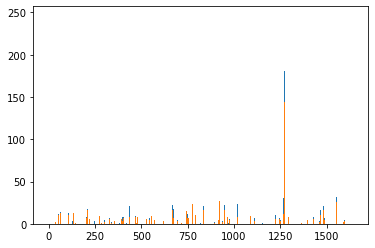

In [16]:
import matplotlib.pyplot as plt

question_id = SATQuestionIDList
correct = SATQuestionsGotRight
wrong = SATQuestionsGotWrong

plt.bar(question_id, correct)
plt.bar(question_id, wrong)

plt.show()

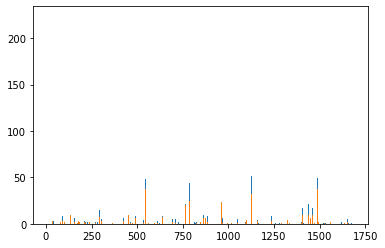

In [17]:
import matplotlib.pyplot as plt

question_id = ACTQuestionIDList
correct = ACTQuestionsGotRight
wrong = ACTQuestionsGotWrong

plt.bar(question_id, correct)
plt.bar(question_id, wrong)

plt.show()

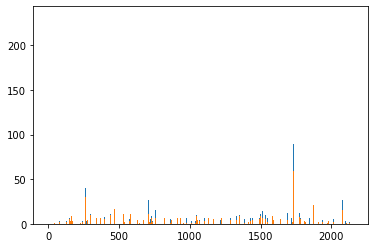

In [18]:
import matplotlib.pyplot as plt

question_id = GMATQuestionIDList
correct = GMATQuestionsGotRight
wrong = GMATQuestionsGotWrong

plt.bar(question_id, correct)
plt.bar(question_id, wrong)

plt.show()

Total Users

In [19]:
frames = [satTable, actTable, gmatTable]
result = pd.concat(frames)
result.sort_values(by = 'question_id', inplace = True)
result

,question_id,UserAmountPerQuestion,Users Right,Users Wrong,Test
0,0,13,6,7,SAT
0,1,3,3,0,GMAT
1,2,24,16,8,GMAT
2,3,9,4,5,GMAT
3,4,4,4,0,GMAT
...,...,...,...,...,...
779,2141,23,13,10,GMAT
780,2148,7,5,2,GMAT
781,2149,29,10,19,GMAT
782,2152,14,9,5,GMAT


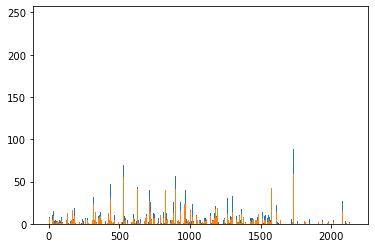

In [20]:
import matplotlib.pyplot as plt

question_id = result['question_id']
correct = result['Users Right']
wrong = result['Users Wrong']

plt.bar(question_id, correct)
plt.bar(question_id, wrong)

plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

feature_cols = ['question_id', 'UserAmountPerQuestion', 'Users Right', 'Users Wrong']
X = result[feature_cols]
Y = result['Test']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1);

k = 3;
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, Y_train)

y_predict = knn.predict(X_test)
accuracy = accuracy_score(Y_test, y_predict)
print(accuracy)

0.4411764705882353


In [22]:
from sklearn.tree import DecisionTreeClassifier

my_decisiontree = DecisionTreeClassifier(random_state=6);

my_decisiontree.fit(X_train, Y_train)
y_predict_dt = my_decisiontree.predict(X_test)

score_dt = accuracy_score(Y_test, y_predict_dt)
print(score_dt)

0.40784313725490196


In [23]:
from sklearn.linear_model import LogisticRegression

my_logreg = LogisticRegression(max_iter = 2000)

my_logreg.fit(X_train, Y_train)
y_predict_lr = my_logreg.predict(X_test)

score_lr = accuracy_score(Y_test, y_predict_lr)
print(score_lr)

0.47843137254901963


In [24]:
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 3);

my_RandomForest.fit(X_train, Y_train);
my_RandomForest.predict = my_RandomForest.predict(X_test)
accuracy = accuracy_score(Y_test, my_RandomForest.predict)
print("accuracy of random forest: " + str(accuracy))

accuracy of random forest: 0.4666666666666667


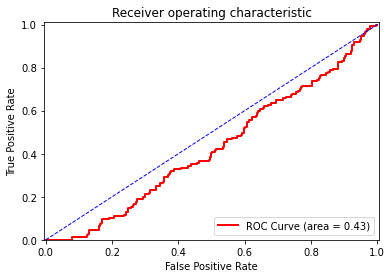

In [25]:
%matplotlib inline
from sklearn import metrics

y_predict_prob_lr = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predict_prob_lr[:,1], pos_label='SAT')
AUC = metrics.auc(fpr, tpr)

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

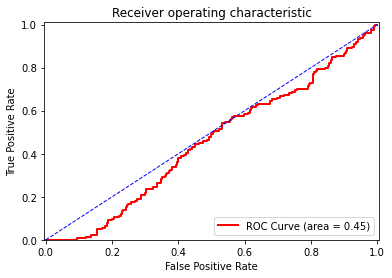

In [26]:
%matplotlib inline
from sklearn import metrics

y_predict_prob_lr = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predict_prob_lr[:,1], pos_label='ACT')
AUC = metrics.auc(fpr, tpr)

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

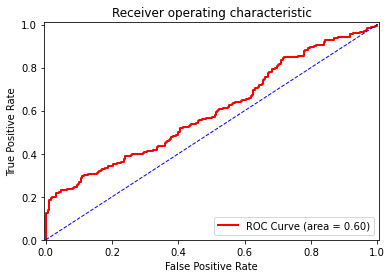

In [27]:
%matplotlib inline
from sklearn import metrics

y_predict_prob_lr = my_logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_predict_prob_lr[:,1], pos_label='GMAT')
AUC = metrics.auc(fpr, tpr)

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()